In [1]:
from google.colab import drive
drive.mount('./drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./drive


In [2]:
!pip install fairseq

     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
  Created wheel for fairseq: filename=fairseq-0.9.0-cp36-cp36m-linux_x86_64.whl size=2035329 sha256=e5698e74cd05aabdb14639282b1095db439b52b0ef879dd235c8e5ceab338f8d
  Stored in directory: /root/.cache/pip/wheels/37/3e/1b/0fa30695dcba41e4b0088067fa40f3328d1e8ee78c22cd4766
Successfully built fairseq


In [3]:
%%bash
for i in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-interactive --path 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/91_result_checkpoints/checkpoint5.pt' --beam $i 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/91_result_data-bin' < 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.ja' | grep '^H' | cut -f 3 > 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/'94_result_$i.txt
done

/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.
/pytorch/aten/sr

In [0]:
%%bash
for i in 1 10 20 30 40 50 60 70 80 90 100
do
fairseq-score --sys 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/'94_result_$i.txt --ref 'drive/My Drive/Colab Notebooks/100_knocks/chapter_10/results/90_result_test.en' > score_$i.txt
done

In [2]:
!pip install japanize-matplotlib

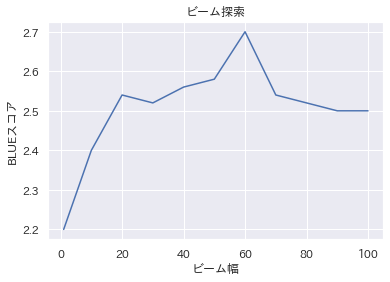

In [4]:
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

x = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y = []

for i in x:
  with open('score_{0}.txt'.format(i)) as file:
    blue = file.readlines()[1]
    blue = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', blue)
    y.append(float(blue.group()))
    
plt.plot(x, y)
plt.title('ビーム探索')
plt.xlabel('ビーム幅')
plt.ylabel('BLUEスコア')
plt.show()